# Problem

A box has three types of particles A, B, C. When two different particles collide, they both turn into the third type of particle e.g. A + B $\rightarrow$ 2C. Investigate.

# Imports

In [434]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
import pandas as pd


# Main

## Functions

### Collisions

In [435]:
def converter(p1, p2):
    '''defines process of conversion'''
    if p1 == 'A':
        if p2 == 'B':
            p3 = p4 = 'C'
        if p2 == 'C':
            p3 = p4 = 'B'
            
    if p1 == 'B':
        if p2 == 'A':
            p3 = p4 = 'C'
        if p2 == 'C':
            p3 = p4 = 'A'
            
    if p1 == 'C':
        if p2 == 'A':
            p3 = p4 = 'B'
        if p2 == 'B':
            p3 = p4 = 'A'

    return p3, p4

In [436]:
def collision(a, b, c, display):
    '''simulates conversion with given starting parameters and alters box constituents'''
    if a==b==0 or b==c==0 or a==c==0:
        return a, b, c
    particles = ['A'] * a + ['B'] * b + ['C'] * c
    p1 = p2 = 0
    while p1 == p2:
        p1, p2 = random.sample(particles, 2)
    particles.remove(p1)
    particles.remove(p2)
    p3, p4 = converter(p1, p2)
    particles.append(p3)
    particles.append(p4)

    if display:
        return p3
        
    return particles.count('A'), particles.count('B'), particles.count('C')

In [437]:
def collision_sim(a0, b0, c0, T, show_plot, stop_early, ignore_initial):
    
    '''simulates process of length T'''
    a_vals = [a0]
    b_vals = [b0]
    c_vals = [c0]
    a_dom, b_dom, c_dom = 0, 0, 0
    tot = a0 + b0 + c0
    a, b, c = a0, b0, c0
    time = T
    
    for i in range(1, T+1):
        a, b, c = collision(a, b, c, False)
        a_vals.append(a)
        b_vals.append(b)
        c_vals.append(c)
        m = max(a,b,c)
        
        if i >= ignore_initial:
            if m == a:
                if m != b and m != c:
                    a_dom += 1
            elif m == b:
                if m != a and m != c:
                    b_dom += 1
            else:
                c_dom += 1
        
        if stop_early:
            if a==tot or b==tot or c==tot:
                time = i
                break
       
    if show_plot:
        t = np.linspace(0, time, time+1)
        plt.step(t, a_vals, label='A', where='post')
        plt.step(t, b_vals, label='B', where='post')
        plt.step(t, c_vals, label='C', where='post')
        plt.title('Step plot of particles over time')
        plt.xlabel('Time')
        plt.ylabel('No. of particles')
        plt.grid(True)
        plt.legend()
        plt.show()

    trials = time - ignore_initial

    return np.array([a_dom, b_dom, c_dom]) / (time - ignore_initial)


In [438]:
def collision_aggregator(a, b, c, T, iterations, stop_early, ignore_initial):
    '''simulates many processes and aggregates'''
    vals = np.zeros(3)
    
    for _ in range(iterations):
        vals += collision_sim(a, b, c, T, False, stop_early, ignore_initial)

    return vals / iterations


### Families

In [411]:
def family_calc(families, y0, counter=0):
    if y0 not in families:
        families.append(y0)
    
    for i in range(3):
        temp = y0
        indices = [0, 1, 2]
        indices.remove(i)
        index1, index2 = indices
        add_func = [-1, -1, -1]
        add_func[i] = 2
        if temp[index1] > 0 and temp[index2] > 0:
            new_temp = [x + y for x, y in zip(temp, add_func)]
            new_temp = [max(0, x) for x in new_temp]
            if new_temp not in families:
                families.append(new_temp)
                family_calc(families, new_temp)

    return families


In [412]:
def valid_states(m):
    states = []

    for i in range(m+1):
        for j in range(m-i+1):
            state = [i,j,m-j-i]
            if state[0] != m and state[1] != m and state[2] != m:
                states.append(state)
                
    return states

## Collision plots

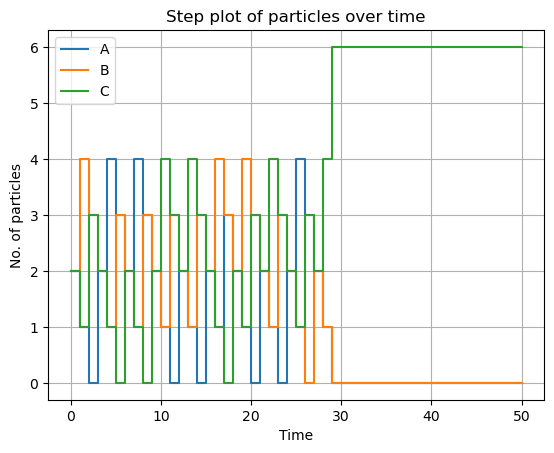

In [150]:
_ = collision_sim(2,2,2,50,True,False)


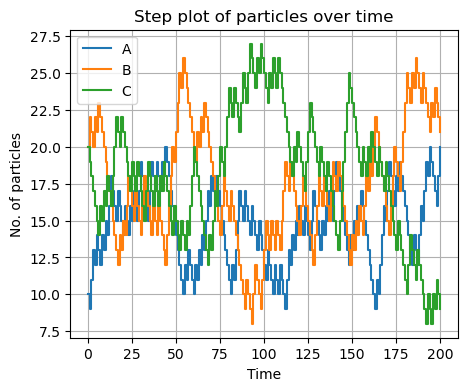

A dominant: 8.0%, B dominant: 33.5%, C dominant: 45.5%


In [90]:
plt.figure(figsize=(5,4))
values = collision_sim(10,20,20,200,True,False)
print(f'A dominant: {round(100*values[0], 1)}%, B dominant: {round(100*values[1],1)}%, C dominant: {round(100*values[2],1)}%')


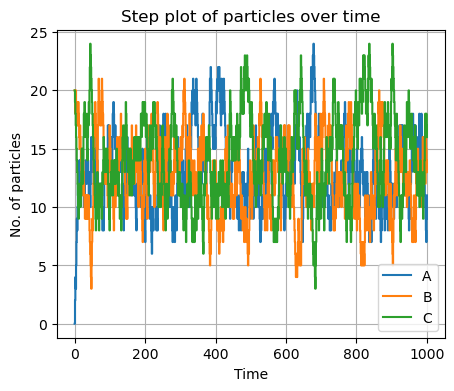

A dominant: 33.4%, B dominant: 20.8%, C dominant: 37.2%


In [103]:
plt.figure(figsize=(5,4))
values = collision_sim(0,20,20,1000,True,False)
print(f'A dominant: {round(100*values[0], 1)}%, B dominant: {round(100*values[1],1)}%, C dominant: {round(100*values[2],1)}%')


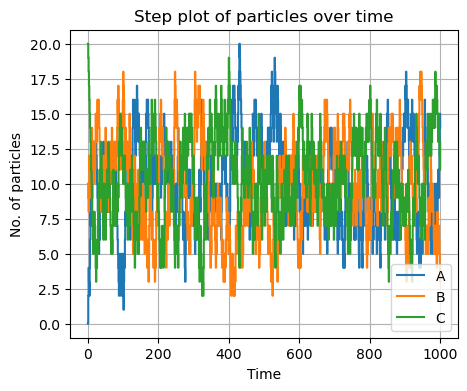

A dominant: 31.2%, B dominant: 31.5%, C dominant: 37.3%


In [151]:
plt.figure(figsize=(5,4))
values = collision_sim(0,10,20,1000,True,False)
print(f'A dominant: {round(100*values[0], 1)}%, B dominant: {round(100*values[1],1)}%, C dominant: {round(100*values[2],1)}%')


## Dominance

#### $y_0=(2,1,1)$

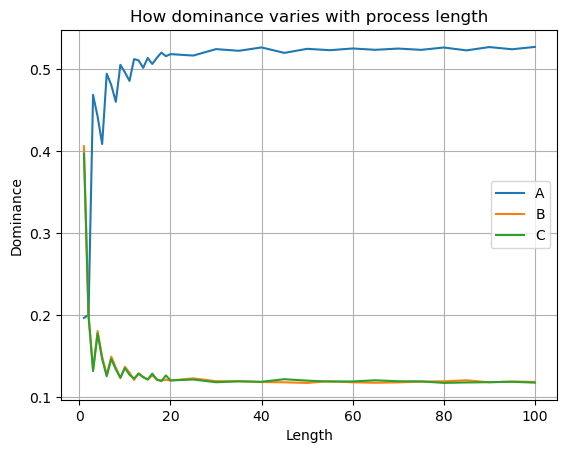

In [35]:
iterations = 10000
n_val = np.concatenate((np.arange(1,20,1), np.arange(20,101,5)))
dominance_val = [collision_aggregator(2, 1, 1, n, iterations, True, 0) for n in n_val]

plt.plot(n_val, dominance_val, label = ['A','B','C'])
plt.title('How dominance varies with process length')
plt.xlabel('Length')
plt.ylabel('Dominance')
plt.legend()
plt.grid()
plt.show()


#### $y_0=(10,20,20)$

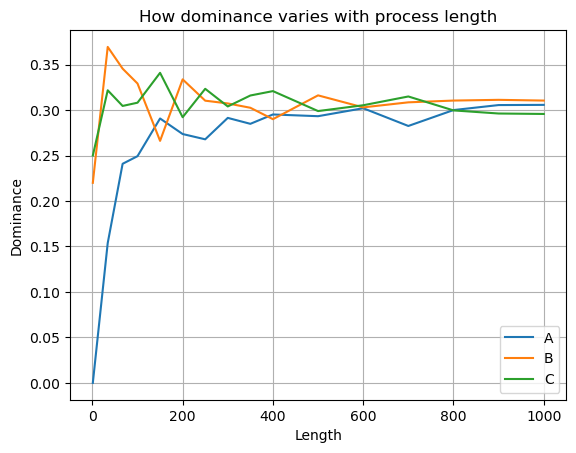

In [104]:
iterations = 1000
n_vals = np.concatenate((np.arange(1,101,33), np.arange(150,401,50), np.arange(500,1001,100)))
dominance_vals = [collision_aggregator(10, 20, 20, n, iterations, True, 0) for n in n_vals]

plt.plot(n_vals, dominance_vals, label = ['A','B','C'])
plt.title('How dominance varies with process length')
plt.xlabel('Length')
plt.ylabel('Dominance')
plt.legend()
plt.grid()
plt.show()


#### $y_0=(0,20,20)$

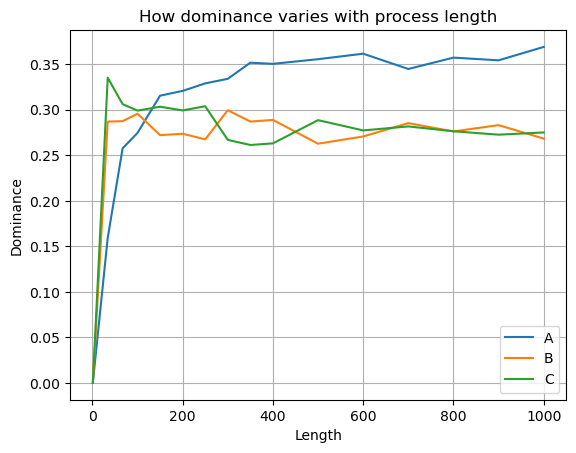

In [157]:
iterations = 100
n_values = np.concatenate((np.arange(1,101,33), np.arange(150,401,50), np.arange(500,1001,100)))
dom_vals = [collision_aggregator(0, 20, 20, n, iterations, True, 0) for n in n_values]

plt.plot(n_values, dom_vals, label = ['A','B','C'])
plt.title('How dominance varies with process length')
plt.xlabel('Length')
plt.ylabel('Dominance')
plt.legend()
plt.grid()
plt.show()


#### $y_0=(k,20,20)$

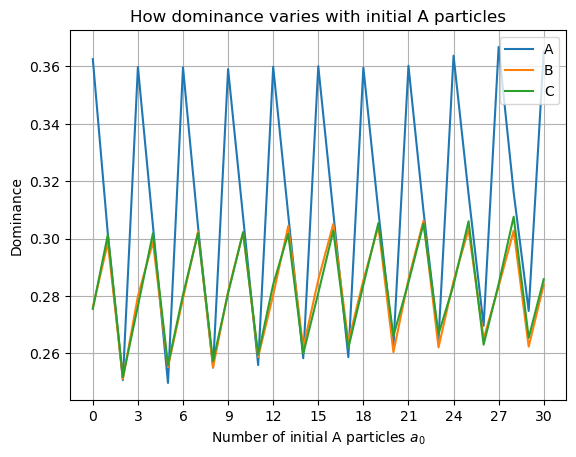

In [142]:
iterations = 1200
a_vals = np.arange(0,31)
domin_vals = [collision_aggregator(a, 20, 20, 2000, iterations, True, 1000) for a in a_vals]

plt.plot(a_vals, domin_vals, '-', label = ['A','B','C'])
plt.title('How dominance varies with initial A particles')
plt.xlabel('Number of initial A particles $a_0$')
plt.ylabel('Dominance')
plt.xticks([3*i for i in range(11)])
plt.grid()
plt.legend()
plt.show()


#### $y_0=(69,16,48), y_0=(13,25,72)$

In [378]:
values1 = collision_aggregator(69,16,48, 2000, 10000, True, 500)
values2 =  collision_aggregator(13,25,72, 2000, 10000, True, 500)

values1 = [round(100*val, 3) for val in values1]
values2 = [round(100*val, 3) for val in values2]


In [379]:
df = pd.DataFrame({
    '$y_0$': ['(69,17,48)', '(13,25,72)'],
    'A dominant': [f'{values1[0]}%', f'{values2[0]}%'],
    'B dominant': [f'{values1[1]}%', f'{values2[1]}%'],
    'C dominant': [f'{values1[2]}%', f'{values2[2]}%']
})

display(df)


,$y_0$,A dominant,B dominant,C dominant
0,"(69,17,48)",29.898%,35.044%,30.272%
1,"(13,25,72)",31.364%,31.361%,31.59%


## Families

In [391]:
families = []
family_roots = []
count = 0
states = valid_states(6)

for state in states:
    if state not in families:
        family_roots.append(state)
        fam = family_calc([], state)
        for memb in fam:
            families.append(memb)
        count+=1
        
for root in family_roots:
    print(family_calc([], root))
    print()

[[0, 1, 2], [2, 0, 1], [1, 2, 0]]

[[0, 2, 1], [2, 1, 0], [1, 0, 2]]

[[1, 1, 1], [3, 0, 0], [0, 3, 0], [0, 0, 3]]



# Extension

## Functions

### 4 particles

In [413]:
def converter_v2(p1, p2):
    '''defines process of conversion'''
    if p1 == 'A':
        if p2 == 'B':
            p3, p4 = 'C', 'D'
        if p2 == 'C':
            p3, p4 = 'B', 'D'
        if p2 == 'D':
            p3, p4 = 'B', 'C'
            
    if p1 == 'B':
        if p2 == 'A':
            p3, p4 = 'C', 'D'
        if p2 == 'C':
            p3, p4 = 'A', 'D'
        if p2 == 'D':
            p3, p4 = 'A', 'C'
    
    if p1 == 'C':
        if p2 == 'A':
            p3, p4 = 'B', 'D'
        if p2 == 'B':
            p3, p4 = 'A', 'D'
        if p2 == 'D':
            p3, p4 = 'A', 'B'
            
    if p1 == 'D':
        if p2 == 'A':
            p3, p4 = 'B', 'C'
        if p2 == 'B':
            p3, p4 = 'A', 'C'
        if p2 == 'C':
            p3, p4 = 'A', 'B'

    return p3, p4

In [414]:
def collision_v2(a, b, c, d, display):
    '''simulates conversion with given starting parameters and alters box constituents'''
    if a==b==c==0 or b==c==d==0 or a==b==d==0 or a==c==d==0:
        return a, b, c,d
    particles = ['A'] * a + ['B'] * b + ['C'] * c + ['D'] * d
    p1 = p2 = 0
    while p1 == p2:
        p1, p2 = random.sample(particles, 2)
    particles.remove(p1)
    particles.remove(p2)
    p3, p4 = converter_v2(p1, p2)
    particles.append(p3)
    particles.append(p4)

    if display:
        return p3, p4
        
    return particles.count('A'), particles.count('B'), particles.count('C'), particles.count('D')

In [415]:
def collision_sim_v2(a0, b0, c0, d0, T, show_plot, stop_early, ignore_initial):
    
    '''simulates process of length T'''
    a_vals = [a0]
    b_vals = [b0]
    c_vals = [c0]
    d_vals = [d0]
    a_dom, b_dom, c_dom, d_dom = 0, 0, 0, 0
    tot = a0 + b0 + c0 + d0
    a, b, c, d = a0, b0, c0, d0
    time = T
    
    for i in range(1, T+1):
        a, b, c, d = collision_v2(a, b, c, d, False)
        a_vals.append(a)
        b_vals.append(b)
        c_vals.append(c)
        d_vals.append(d)
        m = max(a,b,c,d)
        
        if i >= ignore_initial:
            if m == a:
                if m != b and m != c and m != d:
                    a_dom += 1
            elif m == b:
                if m != c and m != d:
                    b_dom += 1
            elif m == c:
                if m != d:
                    c_dom += 1
            else:
                d_dom +=1
        
        if stop_early:
            if a==tot or b==tot or c==tot or d==tot:
                time = i
                break
       
    if show_plot:
        t = np.linspace(0, time, time+1)
        plt.step(t, a_vals, label='A', where='post')
        plt.step(t, b_vals, label='B', where='post')
        plt.step(t, c_vals, label='C', where='post')
        plt.step(t, d_vals, label='D', where='post')
        plt.title('Step plot of particles over time')
        plt.xlabel('Time')
        plt.ylabel('No. of particles')
        plt.grid(True)
        plt.legend()
        plt.show()

    trials = time - ignore_initial

    return np.array([a_dom, b_dom, c_dom, d_dom]) / (time - ignore_initial)


In [416]:
def collision_aggregator_v2(a, b, c, d, T, iterations, stop_early, ignore_initial):
    '''simulates many processes and aggregates'''
    vals = np.zeros(4)
    
    for _ in range(iterations):
        vals += collision_sim_v2(a, b, c, d, T, False, stop_early, ignore_initial)

    return vals / iterations


### Single type conversions

In [417]:
def converter_v3(p1, p2):
    '''defines process of conversion'''
    if p1 == 'A':
        if p2 == 'B':
            p3 = p4 = 'C'
        if p2 == 'C':
            p3 = p4 = 'B'
        if p2 == 'A':
            p3, p4 = 'B', 'C'
            
    if p1 == 'B':
        if p2 == 'A':
            p3 = p4 = 'C'
        if p2 == 'C':
            p3 = p4 = 'A'
        if p2 == 'B':
            p3, p4 = 'A', 'C'
    
    if p1 == 'C':
        if p2 == 'A':
            p3 = p4 = 'B'
        if p2 == 'B':
            p3 = p4 = 'A'
        if p2 == 'C':
            p3, p4 = 'A', 'B'

    return p3, p4

In [418]:
def collision_v3(a, b, c, display):
    '''simulates conversion with given starting parameters and alters box constituents'''
    if a+b+c<2:
        return a, b, c
    particles = ['A'] * a + ['B'] * b + ['C'] * c
    p1, p2 = random.sample(particles, 2)
    particles.remove(p1)
    particles.remove(p2)
    p3, p4 = converter_v3(p1, p2)
    particles.append(p3)
    particles.append(p4)

    if display:
        return p3
        
    return particles.count('A'), particles.count('B'), particles.count('C')

In [419]:
def collision_sim_v3(a0, b0, c0, T, show_plot, stop_early, ignore_initial):
    '''simulates process of length T'''
    a_vals = [a0]
    b_vals = [b0]
    c_vals = [c0]
    a_dom, b_dom, c_dom = 0, 0, 0
    tot = a0 + b0 + c0
    a, b, c = a0, b0, c0
    time = T
    
    for i in range(1, T+1):
        a, b, c = collision_v3(a, b, c, False)
        a_vals.append(a)
        b_vals.append(b)
        c_vals.append(c)
        m = max(a,b,c)
        
        if i >= ignore_initial:
            if m == a:
                if m != b and m != c:
                    a_dom += 1
            elif m == b:
                if m != a and m != c:
                    b_dom += 1
            else:
                c_dom += 1
        
        if stop_early:
            if a==tot or b==tot or c==tot:
                time = i
                break
       
    if show_plot:
        t = np.linspace(0, time, time+1)
        plt.step(t, a_vals, label='A', where='post')
        plt.step(t, b_vals, label='B', where='post')
        plt.step(t, c_vals, label='C', where='post')
        plt.title('Step plot of particles over time')
        plt.xlabel('Time')
        plt.ylabel('No. of particles')
        plt.grid(True)
        plt.legend()
        plt.show()

    trials = time - ignore_initial

    return np.array([a_dom, b_dom, c_dom]) / (time - ignore_initial)


In [428]:
def collision_aggregator_v3(a, b, c, T, iterations, stop_early, ignore_initial):
    '''simulates many processes and aggregates'''
    vals = np.zeros(3)
    
    for _ in range(iterations):
        vals += collision_sim_v3(a, b, c, T, False, stop_early, ignore_initial)

    return vals / iterations


## Plots

### 4 particles

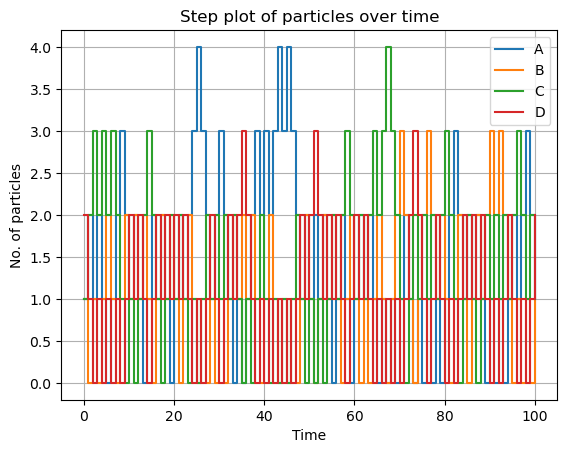

In [426]:
_ = collision_sim_v2(1, 1, 1, 2, 100, True, False, 0)

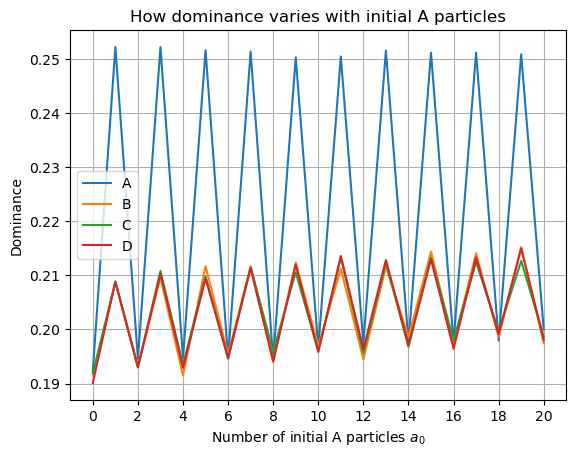

In [448]:
iterations = 3000
a_vals = np.arange(0,21)
domin_vals = [collision_aggregator_v2(a, 20, 20, 20, 3000, iterations, True, 300) for a in a_vals]

plt.plot(a_vals, domin_vals, '-', label = ['A','B','C','D'])
plt.title('How dominance varies with initial A particles')
plt.xlabel('Number of initial A particles $a_0$')
plt.ylabel('Dominance')
plt.xticks([2*i for i in range(11)])
plt.grid()
plt.legend()
plt.show()


### Single type conversions

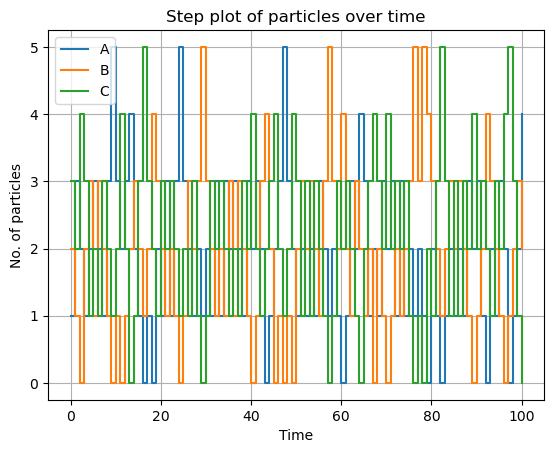

In [427]:
_ = collision_sim_v3(1, 2, 3, 100, True, False, 0)

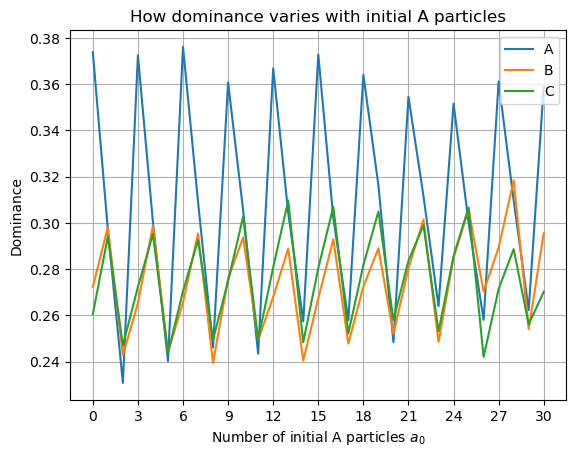

In [432]:
iterations = 100
a_vals = np.arange(0,31)
domin_vals = [collision_aggregator_v3(a, 20, 20, 2000, iterations, True, 1000) for a in a_vals]

plt.plot(a_vals, domin_vals, '-', label = ['A','B','C'])
plt.title('How dominance varies with initial A particles')
plt.xlabel('Number of initial A particles $a_0$')
plt.ylabel('Dominance')
plt.xticks([3*i for i in range(11)])
plt.grid()
plt.legend()
plt.show()
